In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
import gc
from sklearn.preprocessing import StandardScaler

In [272]:
data = pd.read_csv('/Users/anas/Downloads/fraud_data.csv')

In [252]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Downcasting the data for better memory management

In [4]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.6 GB


In [5]:
data.memory_usage(deep=True) * 1e-6

Index               0.000128
step               50.900960
type              409.895225
amount             50.900960
nameOrig          429.364380
oldbalanceOrg      50.900960
newbalanceOrig     50.900960
nameDest          429.360745
oldbalanceDest     50.900960
newbalanceDest     50.900960
isFraud            50.900960
isFlaggedFraud     50.900960
dtype: float64

Treating Categorical Columns

In [6]:
def converted_cats(df, column_list):
    for col in column_list:
        print("converting", col.ljust(30), "size: ", round(df[col].memory_usage(deep=True)*1e-6,2), end="\t")
        df[col] = df[col].astype("category")
        print("->\t", round(df[col].memory_usage(deep=True)*1e-6,2))

In [7]:
converted_cats(data, column_list=["nameDest","type"])

converting nameDest                       size:  429.36	->	 276.8
converting type                           size:  409.9	->	 6.36


Treating columns with dtype int

In [8]:
#This is a function that downcast the integer columns
def reduced_int(df):
    list_of_columns = list(df.select_dtypes(include=["int32", "int64"]).columns)
        
    if len(list_of_columns)>=1:
        max_string_length = max([len(col) for col in list_of_columns]) # finds max string length for better status printing
        print("downcasting integers for:", list_of_columns, "\n")
        
        for col in list_of_columns:
            print("reduced memory usage for:  ", col.ljust(max_string_length+2)[:max_string_length+2],
                  "from", str(round(df[col].memory_usage(deep=True)*1e-6,2)).rjust(8), "to", end=" ")
            df[col] = pd.to_numeric(df[col], downcast="integer")
            print(str(round(df[col].memory_usage(deep=True)*1e-6,2)).rjust(8))
    else:
        print("no columns to downcast")
    
    gc.collect()
    
    print("done")

In [9]:
reduced_int(data)

downcasting integers for: ['step', 'isFraud', 'isFlaggedFraud'] 

reduced memory usage for:   step             from     50.9 to    12.73
reduced memory usage for:   isFraud          from     50.9 to     6.36
reduced memory usage for:   isFlaggedFraud   from     50.9 to     6.36
done


Treating columns with dtype float

In [10]:
#This is a function that downcast the float columns, if you have too many columns to adjust and do not want to see to many messages proceesing, you could comment our the print() columns
def reduced_float(df):
    list_of_columns = list(df.select_dtypes(include=["float64"]).columns)
        
    if len(list_of_columns)>=1:
        max_string_length = max([len(col) for col in list_of_columns]) # finds max string length for better status printing
        print("downcasting float for:", list_of_columns, "\n")
        
        for col in list_of_columns:
            print("reduced memory usage for:  ", col.ljust(max_string_length+2)[:max_string_length+2],
                  "from", str(round(df[col].memory_usage(deep=True)*1e-6,2)).rjust(8), "to", end=" ")
            df[col] = pd.to_numeric(df[col], downcast="float")
            print(str(round(df[col].memory_usage(deep=True)*1e-6,2)).rjust(8))
    else:
        print("no columns to downcast")
    
    gc.collect()
    
    print("done")

In [11]:
reduced_float(data)

downcasting float for: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'] 

reduced memory usage for:   amount           from     50.9 to    25.45
reduced memory usage for:   oldbalanceOrg    from     50.9 to    25.45
reduced memory usage for:   newbalanceOrig   from     50.9 to    25.45
reduced memory usage for:   oldbalanceDest   from     50.9 to    25.45
reduced memory usage for:   newbalanceDest   from     50.9 to    25.45
done


In [12]:
data.memory_usage(deep=True) * 1e-6

Index               0.000128
step               12.725240
type                6.363112
amount             25.450480
nameOrig          429.364380
oldbalanceOrg      25.450480
newbalanceOrig     25.450480
nameDest          276.796632
oldbalanceDest     25.450480
newbalanceDest     25.450480
isFraud             6.362620
isFlaggedFraud      6.362620
dtype: float64

In [13]:
data.shape

(6362620, 11)

Renaming the columns for convinience

In [273]:
data = data.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
print(data.head())

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
data.head()

checking the missing values

In [ ]:
data.isnull().sum()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking the total number of fraud and non fraud txns

[Text(0, 0, '6354407'), Text(0, 0, '8213')]

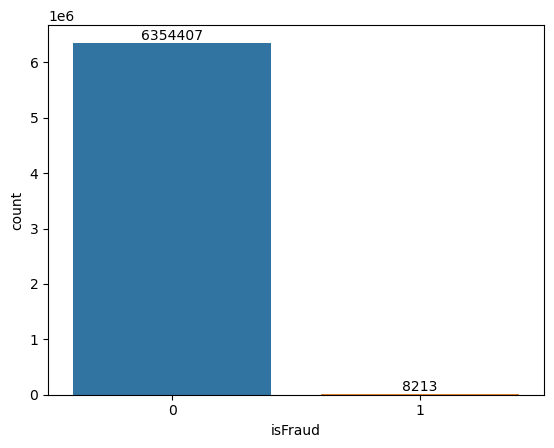

In [15]:
#check isFraud bar chart, Non Fraud vs Fraud (0,1)
ax = sns.countplot(x=data['isFraud'],
                   order=data['isFraud'].value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = data['isFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

[Text(0, 0, '6354407'), Text(0, 0, '8213')]

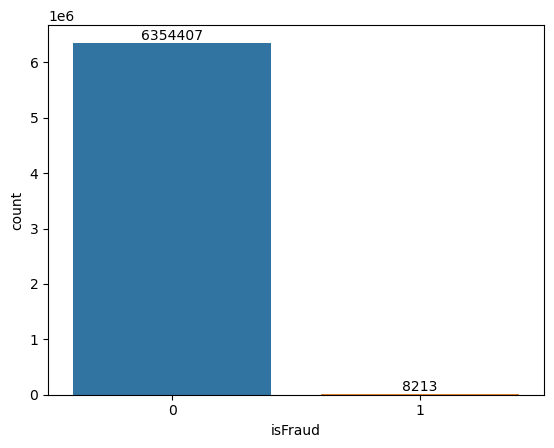

In [16]:
#check isFraud bar chart, Non Fraud vs Fraud (0,1)
ax = sns.countplot(x=data['isFraud'],
                   order=data['isFraud'].value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = data['isFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Lets count the number of transactions by type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


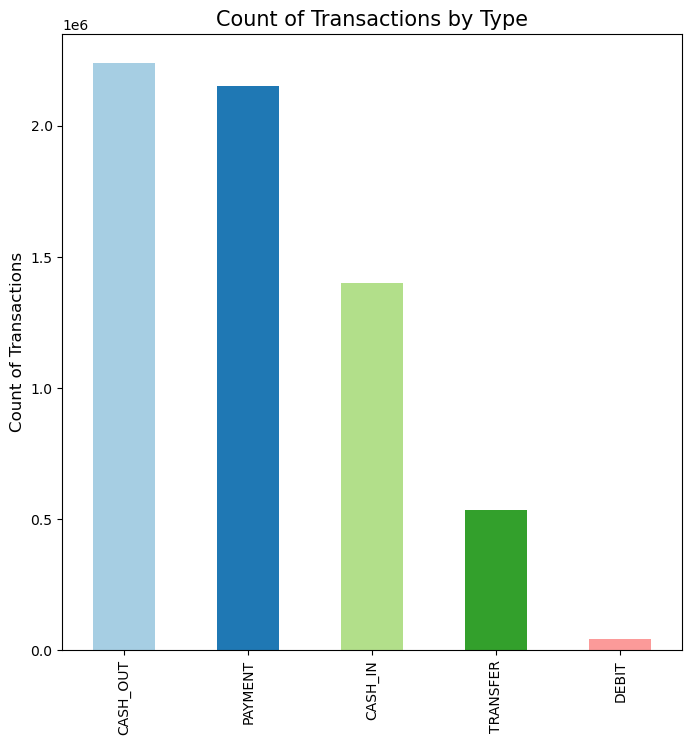

In [17]:
print(data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(4, 2))
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color=plt.cm.Paired(np.arange(len(data.type.unique()))))
plt.ylabel("Count of Transactions", size=12)
plt.title("Count of Transactions by Type", size=15)
plt.show()

lets check the number of fraud values in each of the types

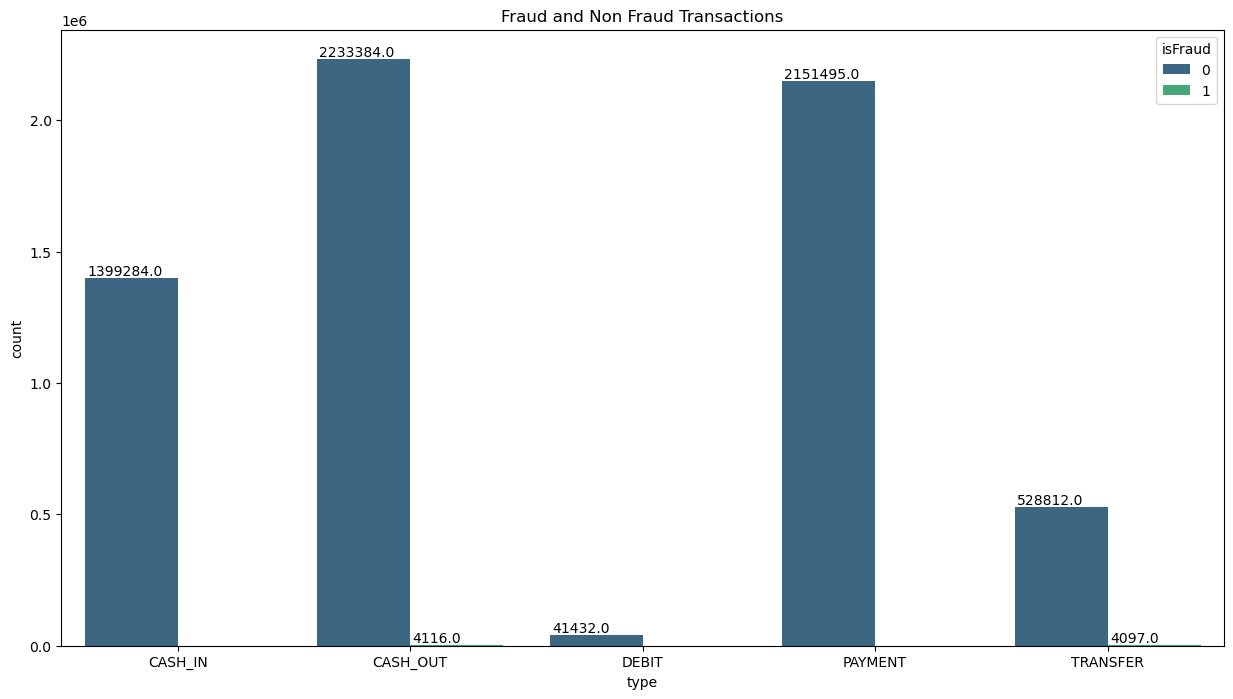

In [18]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = data, x = "type", hue="isFraud", palette = 'viridis')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

<AxesSubplot:>

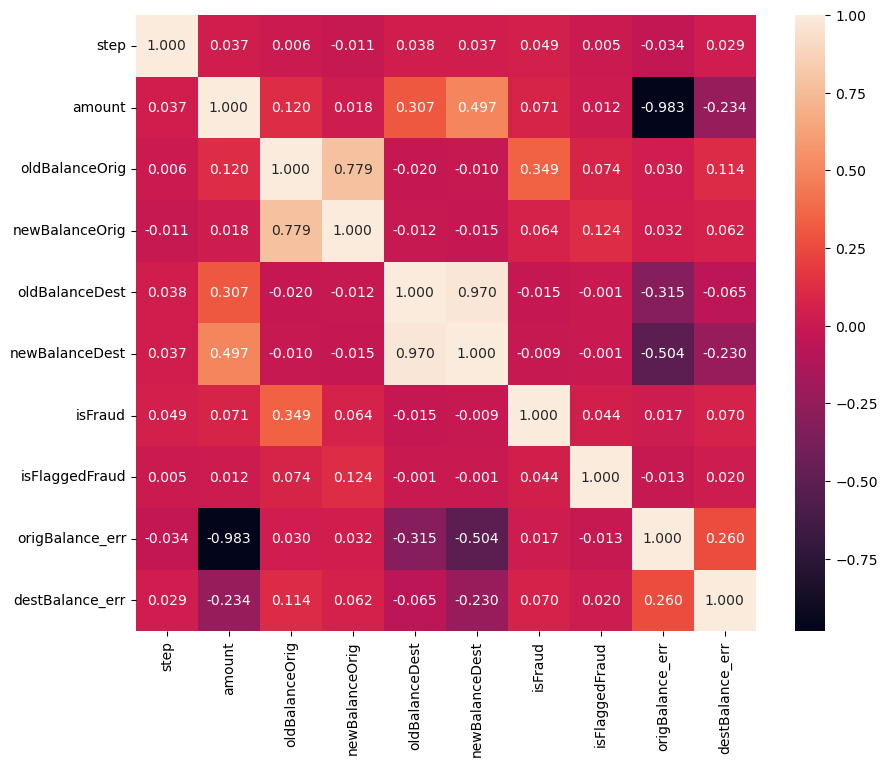

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, fmt = '.3f')

In [19]:
df2 = data[data['type'].isin(['TRANSFER', 'CASH_OUT'])]
df2 = df2.loc[df2['oldBalanceOrig']<150000]

In [20]:
df2.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.000000,C1305486145,181.0,0.0,C553264065,0.0,0.000000e+00,1,0
3,1,CASH_OUT,181.000000,C840083671,181.0,0.0,C38997010,21182.0,0.000000e+00,1,0
15,1,CASH_OUT,229133.937500,C905080434,15325.0,0.0,C476402209,5083.0,5.151344e+04,0,0
19,1,TRANSFER,215310.296875,C1670993182,705.0,0.0,C1100439041,22425.0,0.000000e+00,0,0
24,1,TRANSFER,311685.875000,C1984094095,10835.0,0.0,C932583850,6267.0,2.719173e+06,0,0


In [21]:
df2.oldBalanceOrig.max()

149997.78125

In [22]:
import seaborn as sns

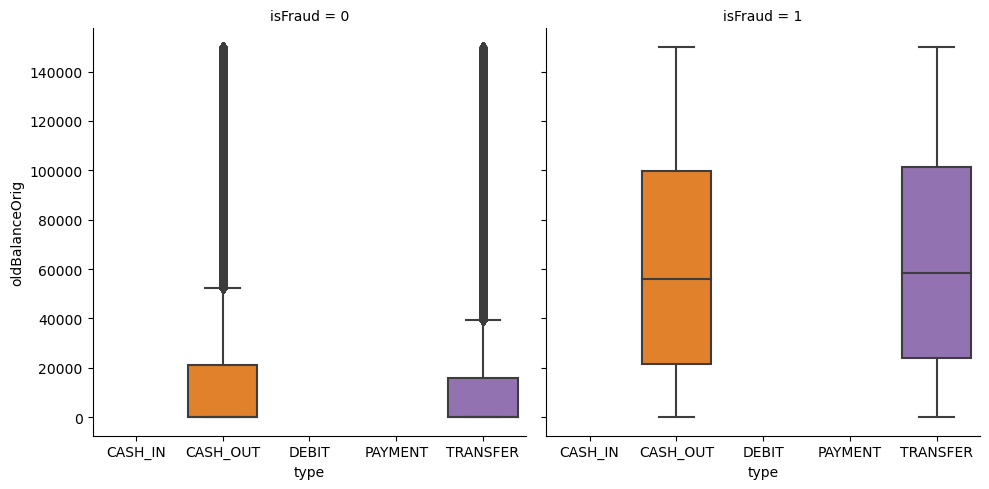

In [23]:
sns.catplot(data = df2, x = 'type', y = 'oldBalanceOrig',col = 'isFraud', kind = 'box', legend_out = 'isFraud');

The plot below shows that the median opening balance in fraudulent transactions is much higher than in non-fraudulent transactions.


This makes sense because the fraudsters would not transfer tiny quantities but will only conduct larger transactions.

# Feature Engineering

# Originator's and recipients balance

In [24]:
print('Transactions where amount is less than zero: ' + str(sum(data['amount'] < 0)))

Transactions where amount is less than zero: 0


In [274]:
# Defining inaccuracies in originator and recipient balances
data['origBalance_err'] = (data['oldBalanceOrig'] - data['amount']) - data['newBalanceOrig']
data['destBalance_err'] = (data['oldBalanceDest'] + data['amount']) - data['newBalanceDest']

In [121]:
data.shape

(6362620, 13)

In [27]:
data.origBalance_err.unique()

array([ 0.0000000e+00, -1.3533601e+03, -5.1799404e+03, ...,
       -6.8604453e+04, -7.3162550e+06, -5.6745480e+06], dtype=float32)

In [262]:
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

In [29]:
print('\n No.fraudulent in TRANSFERs = {}'.
      format(len(dfFraudTransfer)))


 No.fraudulent in TRANSFERs = 4097


In [30]:
print('\n No.fraudulent in TRANSFERs = {}'.
      format(len(dfFraudCashout)))


 No.fraudulent in TRANSFERs = 4116


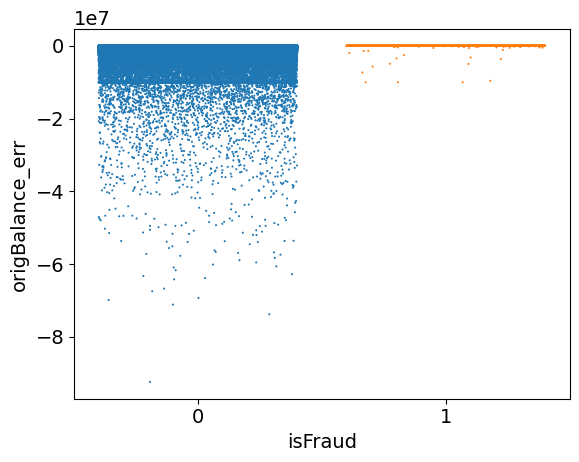

In [98]:
ag = sns.stripplot(x='isFraud', y='origBalance_err', data=data,jitter=0.4, size=1.5)

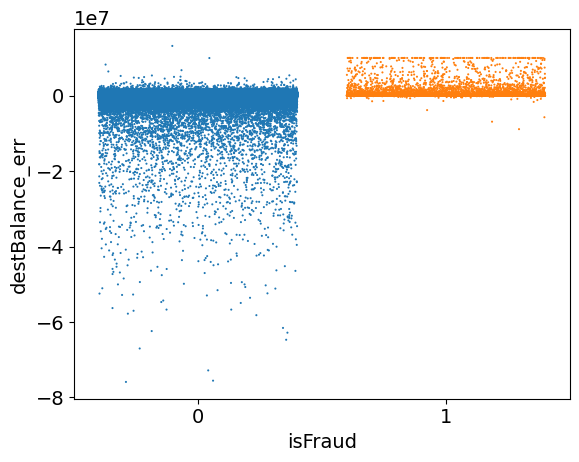

In [99]:
ag2 = sns.stripplot(x='isFraud', y='destBalance_err', data=data,jitter=0.4, size=1.5)

There are differences between fraud and non-fraud in the inaccuracy measures we
analyzed above. In particular, it appears that the inaccuracy in destination balance is
almost always negative for non-fraud transactions, whereas it is almost always positive
for fraud transactions. This could also be potential predictors of fraud.

In [ ]:
#ag2 = sns.stripplot(x='destBalance_err', y='step', data=data,hue='isFraud',jitter=0.4, size=1.5)

In [100]:
data_fraud = data[data['isFraud'].isin([1])]

In [101]:
data_not_fraud = data[data['isFraud'].isin([0])]

In [102]:
data_not_fraud.shape

(6354407, 13)

In [37]:
data_not_fraud.max()

/var/folders/c1/z8f2t00s5jsbjfqrxfx_fg3w0000gn/T/ipykernel_34865/3029328898.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_not_fraud.max()


step                       718
amount              92445520.0
nameOrig            C999999784
oldBalanceOrig      43818856.0
newBalanceOrig      43686616.0
oldBalanceDest     356015904.0
newBalanceDest     356179264.0
isFraud                      0
isFlaggedFraud               0
origBalance_err            4.0
destBalance_err     13191234.0
dtype: object

Text(0.5, 0, 'non fraud')

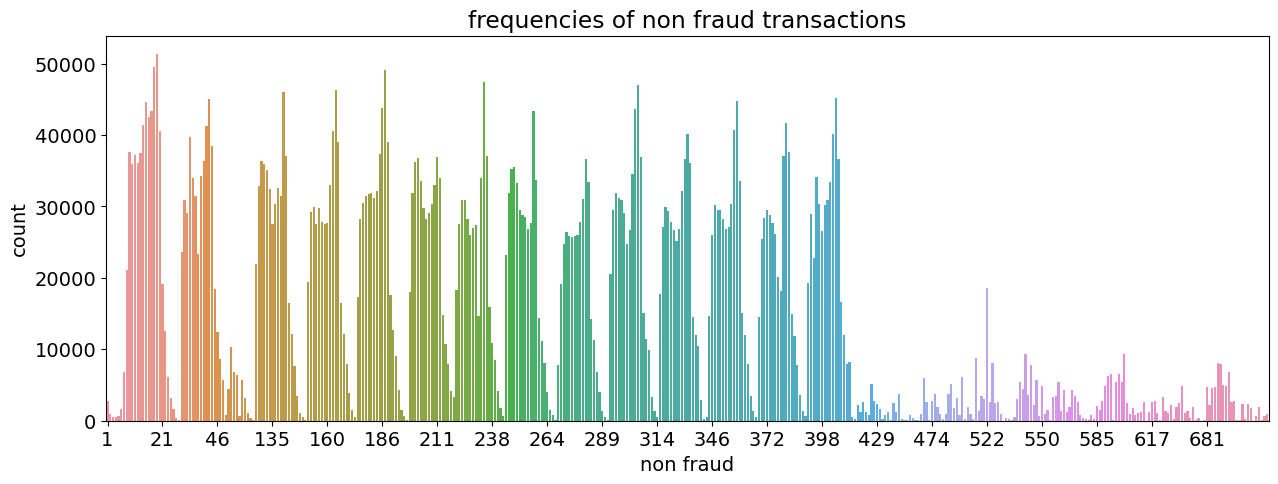

In [103]:
plt.figure(figsize=(15, 5))
#na_fraud = data['isFraud'].isin([0])
#highest_sport = df['Sport'].value_counts().index
sns.countplot(data=data_not_fraud, x='step')#, order=data_not_fraud)
plt.xticks(np.arange(0,402,step=20))
plt.title('frequencies of non fraud transactions')
plt.xlabel('non fraud')
#plt.ylabel('No. of Medals')

Text(0.5, 0, 'fraud')

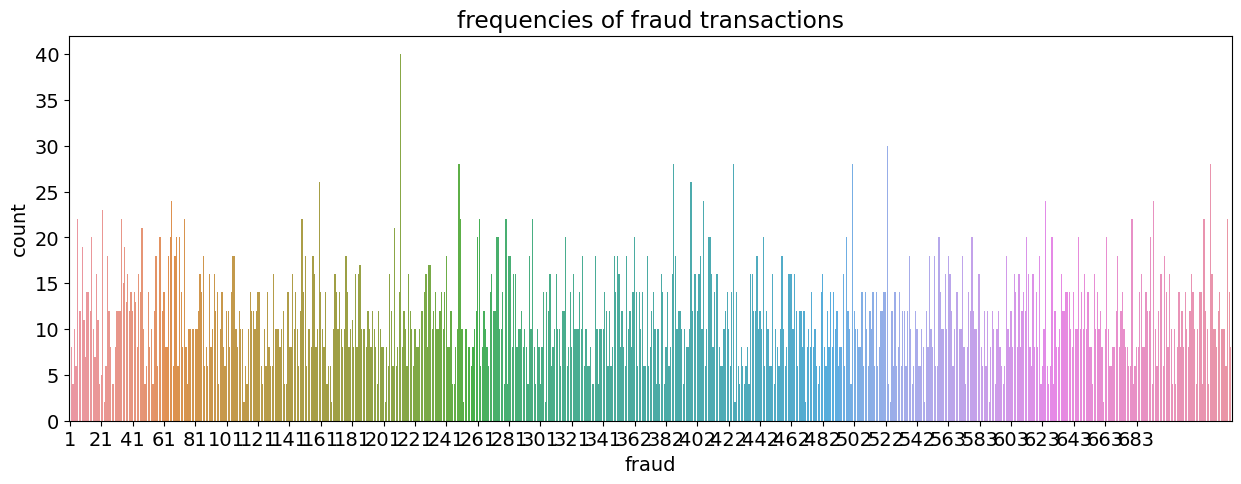

In [104]:
plt.figure(figsize=(15, 5))
#na_fraud = data['isFraud'].isin([0])
#highest_sport = df['Sport'].value_counts().index
sns.countplot(data=data_fraud, x='step')#, order=data_not_fraud)
plt.xticks(np.arange(0, 690, step = 20))
plt.title('frequencies of fraud transactions')
plt.xlabel('fraud')
#plt.tick_params(axis='x', colors='red', direction='out', length=2, width=0.5)
#plt.ylabel('No. of Medals')

number of fraud transaction by amount

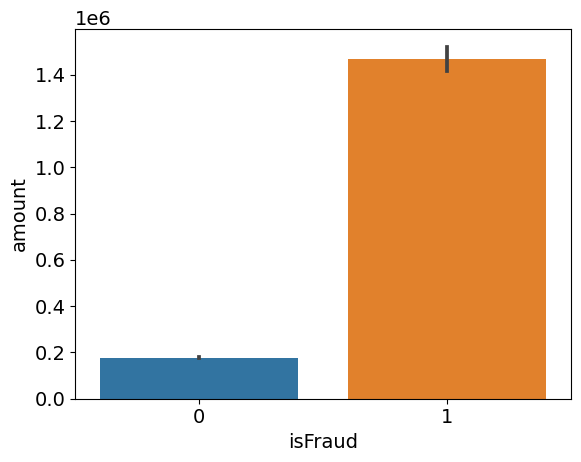

In [105]:
ag = sns.barplot(data = data, x = 'isFraud', y = 'amount' )

dispertion of amount in fraud transactions

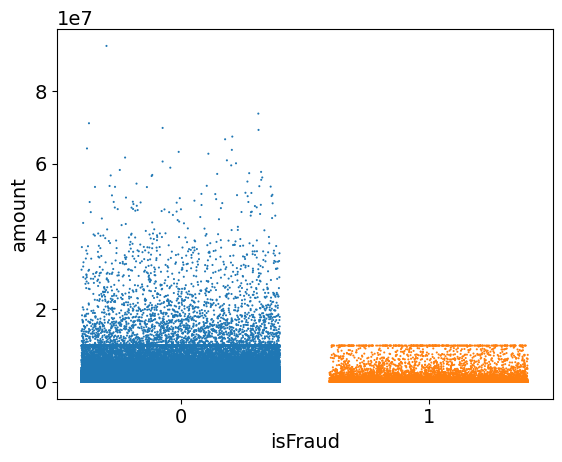

In [106]:
ag = sns.stripplot(x='isFraud', y='amount', data=data,jitter=0.4, size=1.5)

The distribution of transaction amounts indicates that the amount may be slightly higher for Non-Fraud transactions, although nothing can be said conclusively about the differences in transaction amounts between Fraud and Non-Fraud.

In [107]:
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(data.loc[data.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                            # only 'TRANSFER'

dataTransfer = data.loc[data.type == 'TRANSFER']
dataFlagged = data.loc[data.isFlaggedFraud == 1]
dataNotFlagged = data.loc[data.isFlaggedFraud == 0]

print('\nMin amount transacted when isFlaggedFraud is set= {}'\
                                  .format(dataFlagged.amount.min())) # 353874.22

print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
 {}'.format(dataTransfer.loc[dataTransfer.isFlaggedFraud == 0].amount.max())) # 92445516.64


The type of transactions in which isFlaggedFraud is set: ['TRANSFER']

Min amount transacted when isFlaggedFraud is set= 353874.22

Max amount transacted in a TRANSFER where isFlaggedFraud is not set= 92445516.64


Cleasning the data that does not makes sense

In [275]:
print(data.loc[(data.isFraud==1)& (data.oldBalanceOrig<data.amount)].shape)

(29, 13)


Dropping the values of fraud transactions where originator balance before transaction is less than the amount

In [276]:
data = data.drop(data.loc[(data.isFraud==1)& (data.oldBalanceOrig<data.amount)].index) # 29

data = data.drop(data.loc[(data.isFraud==1)& (data.amount==0)].index) # 16

In [277]:
data.shape

(6362575, 13)

In [44]:
print('\n The fraud transactions where amount is zero{}'. format(
    len(data.loc[(data.isFraud==1) & (data.amount==0)])))


 The fraud transactions where amount is zero0


In [45]:
print('\n The fraud transactions where originators balance before transactions is zero{}'. format(
    len(data.loc[(data.isFraud==1) & (data.oldBalanceOrig==0)])))


 The fraud transactions where originators balance before transactions is zero0


In [278]:
data = data[data['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [126]:
data.shape

(2770364, 13)

Creating a dummy variable for type column

In [279]:
dummy_type= pd.get_dummies(data['type'])

In [280]:
data = pd.concat([data,dummy_type],axis=1)

Dropping columns which doesnt help with the prediction

In [281]:
data = data.drop(['type','nameOrig', 'nameDest'], axis=1)

In [204]:
data.shape

(2770364, 12)

In [282]:
data.columns

Index(['step', 'amount', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest',
       'newBalanceDest', 'isFraud', 'isFlaggedFraud', 'origBalance_err',
       'destBalance_err', 'CASH_OUT', 'TRANSFER'],
      dtype='object')

In [283]:
X = data.drop(['isFraud'],axis=1)
y = data['isFraud']

# Splitting the data into train and test

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# RANDOM UNDERSAMPLING

In [285]:
#print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
#print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('After UnderSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(X_rus.shape))

After UnderSampling, the shape of train_X: (11316, 11)
After UnderSampling, the shape of train_y: (11316, 11) 



# Near miss

In [286]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_near, Y_near= nr.fit_resample(X_train, y_train.ravel()) 

# Logistic Regression implementation after RUS

In [287]:
from sklearn.metrics import classification_report, auc, roc_curve 

In [288]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_rus,y_rus)
lm_predict = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("=== Model Accuracy ===")
acc_lm=accuracy_score(lm_predict,y_test)
print(acc_lm)
print('\n')
print("=== Confusion Matrix ===")
cm_lm = confusion_matrix(lm_predict,y_test)
print(cm_lm)

=== Model Accuracy ===
0.8823970352901541


=== Confusion Matrix ===
[[730922     63]
 [ 97678   2447]]


In [289]:
print("=== Classification Report ===")
print(classification_report(y_test, lm_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_lm,recall_lm,thresholds_lm = roc_curve(y_test, lm_predict)
auc_lm=auc(fpr_lm, recall_lm)
print('AUC: %.2f' % auc_lm)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    828600
           1       0.02      0.97      0.05      2510

    accuracy                           0.88    831110
   macro avg       0.51      0.93      0.49    831110
weighted avg       1.00      0.88      0.93    831110



=== All AUC Scores ===
AUC: 0.93


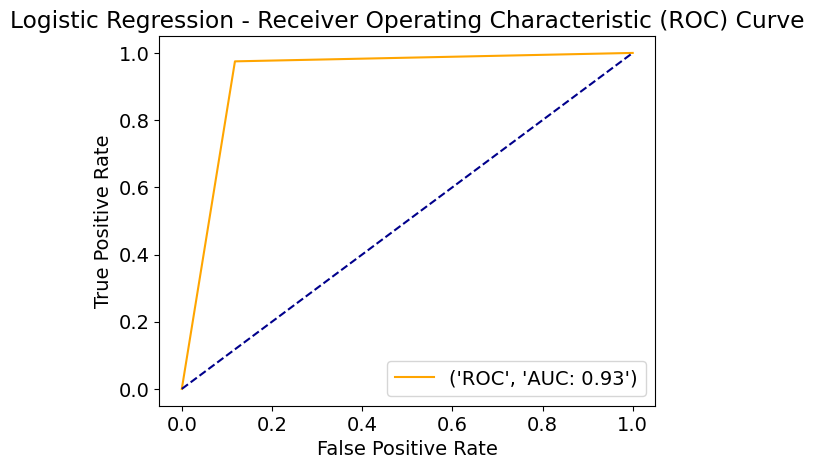

In [290]:
fpr_lm, tpr_lm, thresholds_lm = roc_curve(y_test, lm_predict)

def plot_roc_curve_lm(fpr_lm, tpr_lm):
    plt.plot(fpr_lm, tpr_lm, color='orange', label= ('ROC','AUC: %.2f' % auc_lm))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_lm(fpr_lm, tpr_lm)

# Random Forest Rus

In [291]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100, oob_score=False, n_jobs=-1, min_samples_leaf=1)
rf.fit(X_rus,y_rus)
rf_predict = rf.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_rf=accuracy_score(rf_predict,y_test)
print(acc_rf)
print('\n')
print("=== Confusion Matrix ===")
cm_rf = confusion_matrix(rf_predict,y_test)
print(cm_rf)

=== Model Accuracy ===
0.9998592244107278


=== Confusion Matrix ===
[[828484      1]
 [   116   2509]]


In [292]:
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_rf, recall_rf, thresholds_rf = roc_curve(y_test, rf_predict)
auc_rf=auc(fpr_rf, recall_rf)
print('AUC: %.2f' % auc_rf)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828600
           1       0.96      1.00      0.98      2510

    accuracy                           1.00    831110
   macro avg       0.98      1.00      0.99    831110
weighted avg       1.00      1.00      1.00    831110



=== All AUC Scores ===
AUC: 1.00


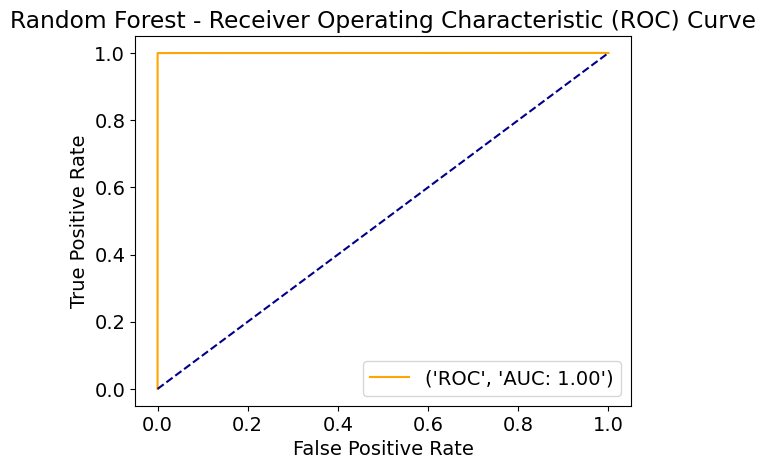

In [293]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_predict)

def plot_roc_curve_rf(fpr_rf, tpr_rf):
    plt.plot(fpr_rf, tpr_rf, color='orange', label= ('ROC','AUC: %.2f' % auc_rf))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_rf(fpr_rf, tpr_rf)

# Decision Tree classifier after RUS

In [294]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_rus,y_rus)
dt_predict = dt.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_dt=accuracy_score(dt_predict,y_test)
print(acc_dt)
print('\n')
print("=== Confusion Matrix ===")
cm_dt = confusion_matrix(dt_predict,y_test)
print(cm_dt)

=== Model Accuracy ===
0.9998508019395748


=== Confusion Matrix ===
[[828477      1]
 [   123   2509]]


In [295]:
print("=== Classification Report ===")
print(classification_report(y_test, dt_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_dt, recall_dt, thresholds_dt = roc_curve(y_test, dt_predict)
auc_dt=auc(fpr_dt, recall_dt)
print('AUC: %.2f' % auc_dt)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828600
           1       0.95      1.00      0.98      2510

    accuracy                           1.00    831110
   macro avg       0.98      1.00      0.99    831110
weighted avg       1.00      1.00      1.00    831110



=== All AUC Scores ===
AUC: 1.00


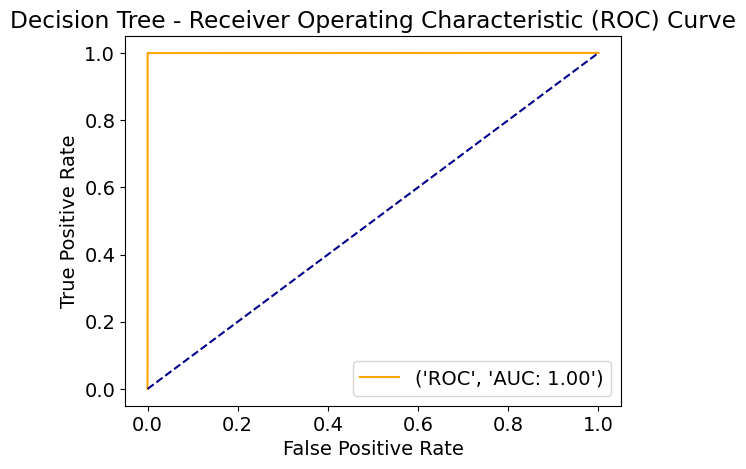

In [296]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_predict)

def plot_roc_curve_dt(fpr_dt, tpr_dt):
    plt.plot(fpr_dt, tpr_dt, color='orange', label= ('ROC','AUC: %.2f' % auc_dt))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_dt(fpr_dt, tpr_dt)

# XGBoost after RUS

In [297]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_rus,y_rus)
xgb_predict = xgb.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_xgb=accuracy_score(xgb_predict,y_test)
print(acc_xgb)
print('\n')
print("=== Confusion Matrix ===")
cm_xgb = confusion_matrix(xgb_predict,y_test)
print(cm_xgb)

=== Model Accuracy ===
0.9999061496071519


=== Confusion Matrix ===
[[828523      1]
 [    77   2509]]


In [298]:
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_xgb, recall_xgb, thresholds_xgb = roc_curve(y_test, xgb_predict)
auc_xgb=auc(fpr_xgb, recall_xgb)
print('AUC: %.2f' % auc_xgb)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828600
           1       0.97      1.00      0.98      2510

    accuracy                           1.00    831110
   macro avg       0.99      1.00      0.99    831110
weighted avg       1.00      1.00      1.00    831110



=== All AUC Scores ===
AUC: 1.00


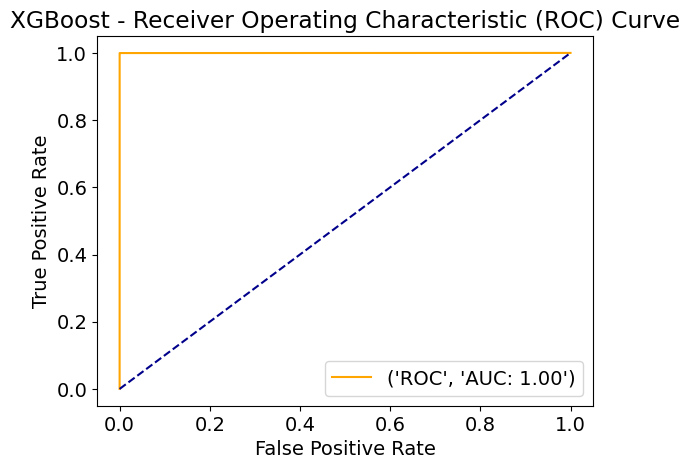

In [299]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_predict)

def plot_roc_curve_xgb(fpr_xgb, tpr_xgb):
    plt.plot(fpr_xgb, tpr_xgb, color='orange', label= ('ROC','AUC: %.2f' % auc_xgb))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_xgb(fpr_xgb, tpr_xgb)

# Checking the performance of models after applying near miss

In [ ]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_near, Y_near= nr.fit_resample(X_train, y_train.ravel()) 

# Logistic Regression

In [300]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(X_near,Y_near)
lm_predict2 = lr2.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("=== Model Accuracy ===")
acc_lm2=accuracy_score(lm_predict2,y_test)
print(acc_lm2)
print('\n')
print("=== Confusion Matrix ===")
cm_lm2 = confusion_matrix(lm_predict2,y_test)
print(cm_lm2)

=== Model Accuracy ===
0.4052652476808124


=== Confusion Matrix ===
[[334651    341]
 [493949   2169]]


In [301]:
print("=== Classification Report ===")
print(classification_report(y_test, lm_predict2))
print('\n')
print("=== All AUC Scores ===")
fpr_lm2,recall_lm2,thresholds_lm2 = roc_curve(y_test, lm_predict2)
auc_lm2=auc(fpr_lm2, recall_lm2)
print('AUC: %.2f' % auc_lm2)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.40      0.58    828600
           1       0.00      0.86      0.01      2510

    accuracy                           0.41    831110
   macro avg       0.50      0.63      0.29    831110
weighted avg       1.00      0.41      0.57    831110



=== All AUC Scores ===
AUC: 0.63


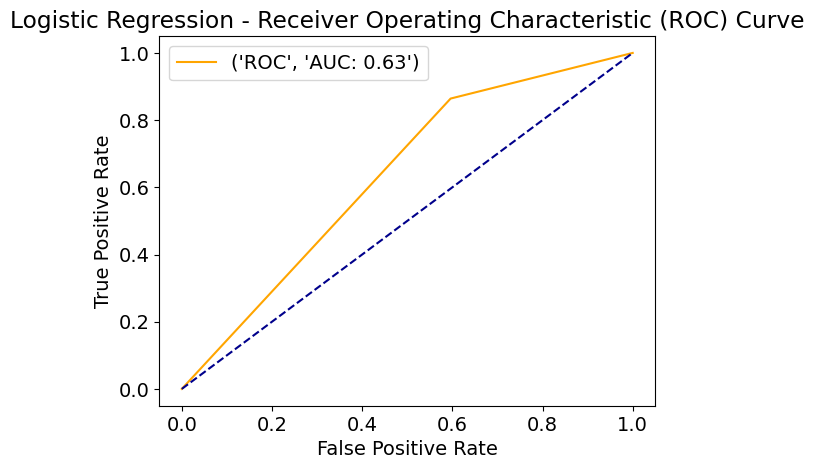

In [302]:
fpr_lm2, tpr_lm2, thresholds_lm2 = roc_curve(y_test, lm_predict2)

def plot_roc_curve_lm2(fpr_lm, tpr_lm):
    plt.plot(fpr_lm2, tpr_lm2, color='orange', label= ('ROC','AUC: %.2f' % auc_lm2))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_lm2(fpr_lm2, tpr_lm2)

# Decision Tree

In [303]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth=10)
dt2.fit(X_near,Y_near)
dt2_predict = dt2.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_dt2=accuracy_score(dt2_predict,y_test)
print(acc_dt2)
print('\n')
print("=== Confusion Matrix ===")
cm_dt2 = confusion_matrix(dt2_predict,y_test)
print(cm_dt2)

=== Model Accuracy ===
0.9916196412027288


=== Confusion Matrix ===
[[821636      1]
 [  6964   2509]]


In [304]:
print("=== Classification Report ===")
print(classification_report(y_test, dt2_predict))
print('\n')
print("=== All AUC Scores ===")
fpr_dt2, recall_dt2, thresholds_dt2 = roc_curve(y_test, dt2_predict)
auc_dt2=auc(fpr_dt2, recall_dt2)
print('AUC: %.2f' % auc_dt2)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    828600
           1       0.26      1.00      0.42      2510

    accuracy                           0.99    831110
   macro avg       0.63      1.00      0.71    831110
weighted avg       1.00      0.99      0.99    831110



=== All AUC Scores ===
AUC: 1.00


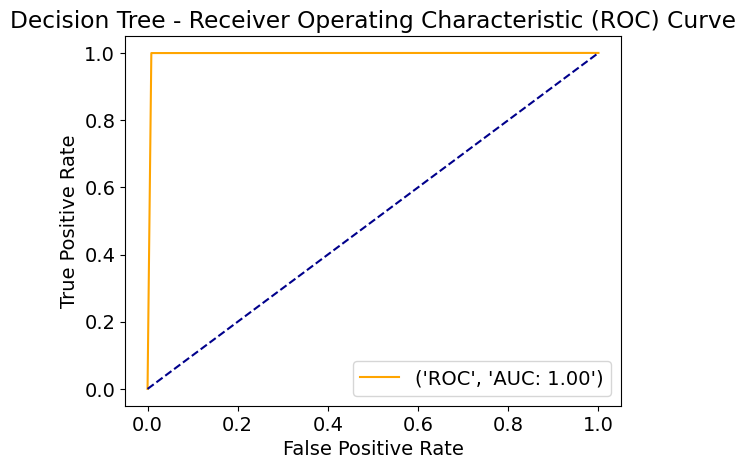

In [305]:
fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test, dt2_predict)

def plot_roc_curve_dt2(fpr_dt2, tpr_dt2):
    plt.plot(fpr_dt2, tpr_dt2, color='orange', label= ('ROC','AUC: %.2f' % auc_dt2))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_dt2(fpr_dt2, tpr_dt2)

# Random Forest Classifier

In [306]:
from sklearn.ensemble import RandomForestClassifier
rf2= RandomForestClassifier(n_estimators=100, oob_score=False, n_jobs=-1, min_samples_leaf=1)
rf2.fit(X_near,Y_near)
rf_predict2 = rf2.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_rf2=accuracy_score(rf_predict2,y_test)
print(acc_rf2)
print('\n')
print("=== Confusion Matrix ===")
cm_rf2 = confusion_matrix(rf_predict2,y_test)
print(cm_rf2)

=== Model Accuracy ===
0.9979858261842596


=== Confusion Matrix ===
[[826927      1]
 [  1673   2509]]


In [307]:
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict2))
print('\n')
print("=== All AUC Scores ===")
fpr_rf2, recall_rf2, thresholds_rf2 = roc_curve(y_test, rf_predict2)
auc_rf2=auc(fpr_rf2, recall_rf2)
print('AUC: %.2f' % auc_rf2)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828600
           1       0.60      1.00      0.75      2510

    accuracy                           1.00    831110
   macro avg       0.80      1.00      0.87    831110
weighted avg       1.00      1.00      1.00    831110



=== All AUC Scores ===
AUC: 1.00


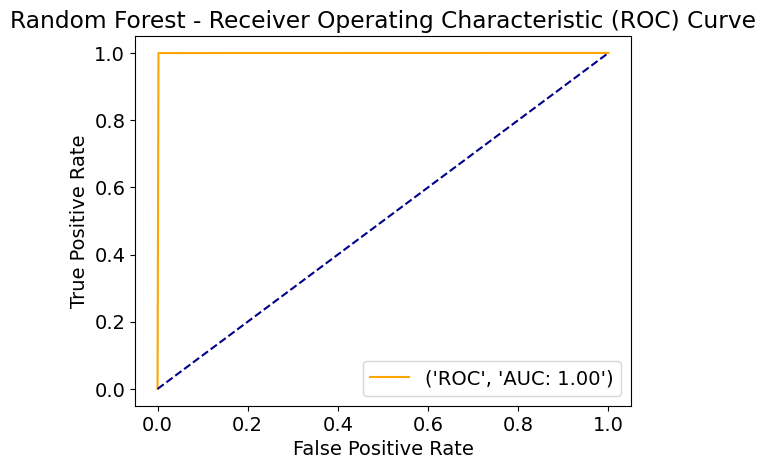

In [308]:
fpr_rf2, tpr_rf2, thresholds_rf2 = roc_curve(y_test, rf_predict2)

def plot_roc_curve_rf2(fpr_rf2, tpr_rf2):
    plt.plot(fpr_rf2, tpr_rf2, color='orange', label= ('ROC','AUC: %.2f' % auc_rf2))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_rf2(fpr_rf2, tpr_rf2)

# XGBoost

In [309]:
from xgboost import XGBClassifier
xgb2 = XGBClassifier()
xgb2.fit(X_near,Y_near)
xgb_predict2 = xgb2.predict(X_test)

# Check the accuracy score and confusion matrix
print("=== Model Accuracy ===")
acc_xgb2=accuracy_score(xgb_predict2,y_test)
print(acc_xgb2)
print('\n')
print("=== Confusion Matrix ===")
cm_xgb2 = confusion_matrix(xgb_predict2,y_test)
print(cm_xgb2)

=== Model Accuracy ===
0.9961822141473451


=== Confusion Matrix ===
[[825428      1]
 [  3172   2509]]


In [310]:
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict2))
print('\n')
print("=== All AUC Scores ===")
fpr_xgb2, recall_xgb2, thresholds_xgb2 = roc_curve(y_test, xgb_predict2)
auc_xgb2=auc(fpr_xgb2, recall_xgb2)
print('AUC: %.2f' % auc_xgb2)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828600
           1       0.44      1.00      0.61      2510

    accuracy                           1.00    831110
   macro avg       0.72      1.00      0.81    831110
weighted avg       1.00      1.00      1.00    831110



=== All AUC Scores ===
AUC: 1.00


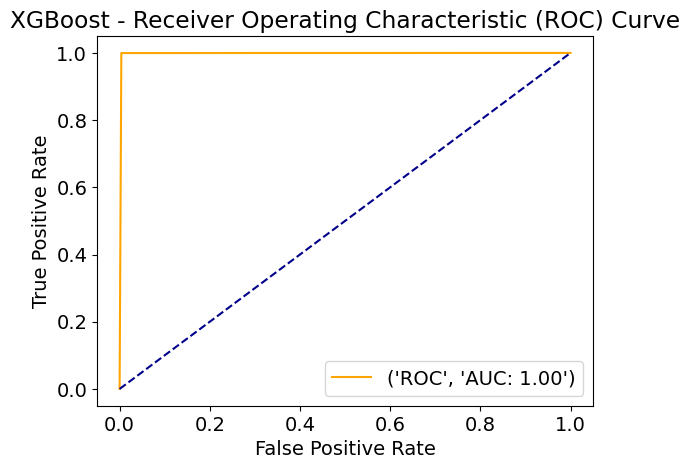

In [311]:
fpr_xgb2, tpr_xgb2, thresholds_xgb2 = roc_curve(y_test, xgb_predict2)

def plot_roc_curve_xgb2(fpr_xgb2, tpr_xgb2):
    plt.plot(fpr_xgb2, tpr_xgb2, color='orange', label= ('ROC','AUC: %.2f' % auc_xgb2))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve_xgb2(fpr_xgb2, tpr_xgb2)

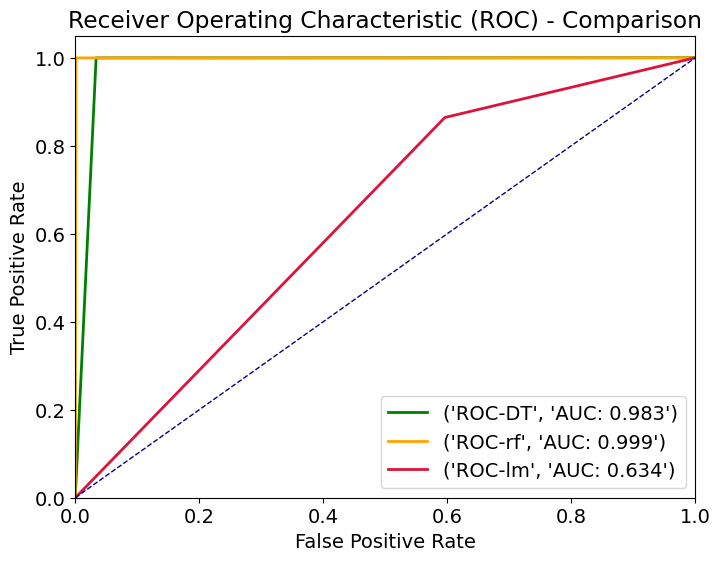

In [237]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
#plt.plot(fpr_xgb, tpr_xgb, color='darkorange',lw=2, label= ('ROC-XGB','AUC: %.3f' % auc_xgb))

plt.plot(fpr_dt2, tpr_dt2, color='green',lw=2 ,label= ('ROC-DT','AUC: %.3f' % auc_dt2))

plt.plot(fpr_rf2, tpr_rf2, color='orange',lw=2, label= ('ROC-rf','AUC: %.3f' % auc_rf2))

plt.plot(fpr_lm2, tpr_lm2, color='crimson',lw=2, label= ('ROC-lm','AUC: %.3f' % auc_lm2))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.show()

# Model Comparision unsing random Under sampling

In [ ]:
# create data
df2 = pd.DataFrame([['LR', 88, 51,93, 99], ['DT', 100, 98, 100, 99], ['RF', 100, 86, 100, 92],
                  ['XGB', 100, 72, 100, 81 ]],
                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
# view data
print(df)
  
# plot grouped bar chart
plt.figure(figsize=(10,10))
df.plot(x='Model',
        kind='bar',
        figsize=(8,6),
        stacked=False,
        title='Model Comparision')

# Model Comparision after Near miss

  Model  Accuracy  Precision  Recall  F1-Score
0    LR        41         50      63        57
1    DT        97         54      97        57
2    RF       100         86     100        92
3   XGB       100         72     100        81


<AxesSubplot:title={'center':'Model Comparision after near miss'}, xlabel='Model'>

<Figure size 1000x1000 with 0 Axes>

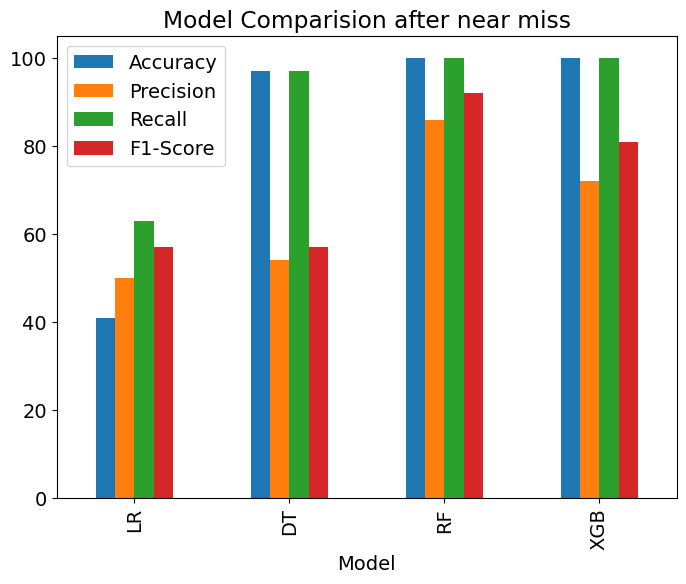

In [258]:
# create data
df = pd.DataFrame([['LR', 41, 50, 63, 57], ['DT', 97, 54, 97, 57], ['RF', 100, 86, 100, 92],
                  ['XGB', 100, 72, 100, 81 ]],
                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
# view data
print(df)
  
# plot grouped bar chart
plt.figure(figsize=(10,10))
df.plot(x='Model',
        kind='bar',
        figsize=(8,6),
        stacked=False,
        title='Model Comparision after near miss')

# Model Comparision on the Data after Random Undersampling

  Model  Accuracy  Precision  Recall  F1-Score
0    LR        41         50      63        57
1    DT        97         54      97        57
2    RF       100         86     100        92
3   XGB       100         72     100        81


<AxesSubplot:title={'center':'Model Comparision RUS'}, xlabel='Model'>

<Figure size 1000x1000 with 0 Axes>

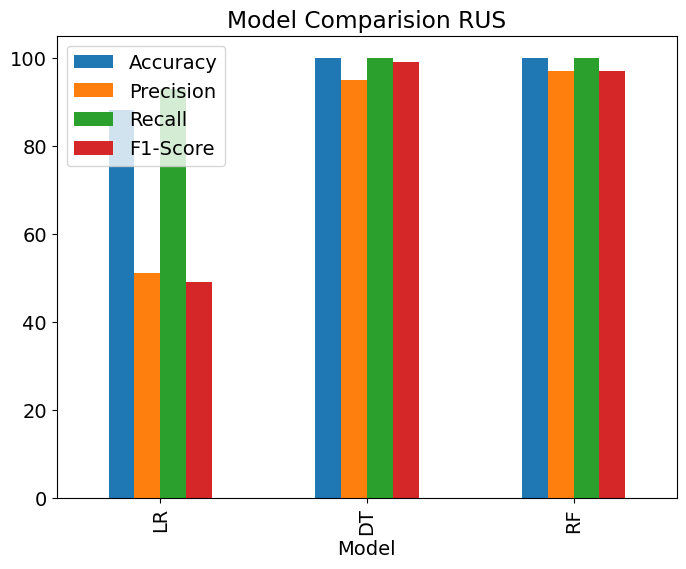

In [257]:
# create data
df2 = pd.DataFrame([['LR', 88.23, 51, 93, 49], ['DT', 99.99, 95, 99.99, 99], ['RF', 99.99, 97, 99.99, 97]],
                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
# view data
print(df)
  
# plot grouped bar chart
plt.figure(figsize=(10,10))
df2.plot(x='Model',
        kind='bar',
        figsize=(8,6),
        stacked=False,
        title='Model Comparision RUS')

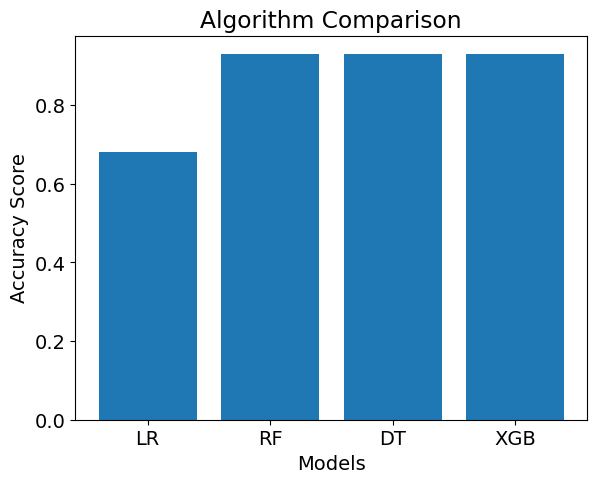

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
algo = ['LR','RF', 'DT', 'XGB']
acc = [0.68,0.93,0.93,0.93]
ax.bar(algo,acc)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Algorithm Comparison')
plt.show()

In this transformation, we convert all columns in the data to have the same range. This is
done through the standard scaler feature available in python. The following code snippet
is used to perform this transformation.

In [177]:
'''std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(data.loc[:,~data.columns.isin(['isFraud'])]))
data_scaled.columns = data.columns[:-1]
data_scaled['isFraud'] = data['isFraud']'''

# SPLITTING THE DATA

In [219]:
X = data.loc[:, data.columns != 'isFraud']
y = data.loc[:, data.columns == 'isFraud']

In [223]:
std_sc = StandardScaler()
data_scaled3 = pd.DataFrame(std_scaler.fit_transform(data.loc[:,~data.columns.isin(['isFraud'])]))
data_scaled3.columns = data.columns[:-1]
data_scaled3['isFraud'] = data['isFraud']

In [224]:
data_scaled3.head()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,origBalance_err,destBalance_err,type_CASH_OUT
0,-1.70184,-0.357466,-0.188849,-0.10639,-0.403156,-0.438260,NaN,0.326718,0.048572,-2.049053,2.049053
1,-1.70184,-0.357466,-0.188849,-0.10639,-0.398143,-0.438260,NaN,0.326718,0.084264,0.488030,-0.488030
2,-1.70184,-0.099577,-0.128593,-0.10639,-0.401953,-0.427246,1.0,0.082457,0.356128,0.488030,-0.488030
3,-1.70184,-0.115147,-0.186764,-0.10639,-0.397849,-0.438260,1.0,0.081547,0.448859,-2.049053,2.049053
4,-1.70184,-0.006591,-0.146458,-0.10639,-0.401673,0.143130,NaN,-0.016982,-3.997868,-2.049053,2.049053


In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [206]:
X_train_original.head()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFlaggedFraud,origBalance_err,destBalance_err,type_CASH_OUT,type_TRANSFER
849066,41,152974.88,14977.0,0.0,0.00,152974.88,0,-137997.88,0.00,1,0
3176344,238,5236.47,0.0,0.0,26948.96,32185.43,0,-5236.47,0.00,1,0
3453513,257,22736.27,0.0,0.0,249300.06,272036.34,0,-22736.27,-0.01,1,0
4049773,300,47557.32,0.0,0.0,80006.87,127564.19,0,-47557.32,0.00,1,0
1580594,155,131514.65,0.0,0.0,545070.57,676585.22,0,-131514.65,0.00,1,0


In [92]:
y = X['isFraud']

In [99]:
X.columns

Index(['step', 'type', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
       'oldBalanceDest', 'newBalanceDest', 'origBalance_err',
       'destBalance_err'],
      dtype='object')

In [134]:
X = X.drop(columns = 'isFlaggedFraud')

In [100]:
X.type.value_counts

<bound method IndexOpsMixin.value_counts of 2          TRANSFER
3          CASH_OUT
15         CASH_OUT
19         TRANSFER
24         TRANSFER
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 2770364, dtype: category
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']>

Getting the dummy variables from one of the one categorical column that is type

In [137]:
X.columns

Index(['step', 'amount', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest',
       'newBalanceDest', 'isFraud', 'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')

In [53]:
dfFraudTransfer.shape

(4092, 11)

In [135]:
X['type'].value_counts()

CASH_OUT    2237460
TRANSFER     532904
Name: type, dtype: int64

In [138]:
X.shape

(2770364, 9)

In [ ]:
std_scaler = StandardScaler()
data_scaled =
pd.DataFrame(std_scaler.fit_transform(data.loc[:,~data.columns.isin(['isFraud'])]))
data_scaled.columns = data.columns[:-1]
data_scaled['isFraud'] = data['isFraud']

In [140]:
data.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
